## REGULARIZATION - LASSO (L1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Clean_Data_no_remove_skew.csv')

## adjusting skewed feature

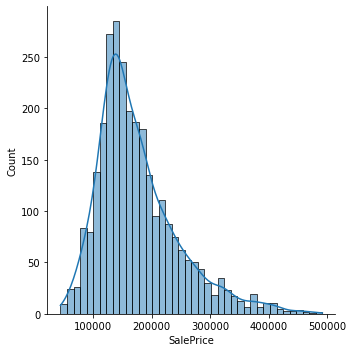

In [3]:
sns.displot(data=df,x='SalePrice',kde=True);

In [4]:
df['SalePrice'].skew()

1.226112963757501

In [5]:
df['SalePrice']=np.sqrt(df['SalePrice'])

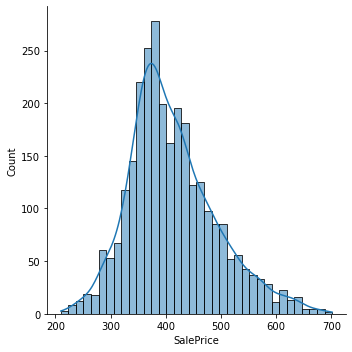

In [6]:
sns.displot(data=df,x='SalePrice',kde=True);

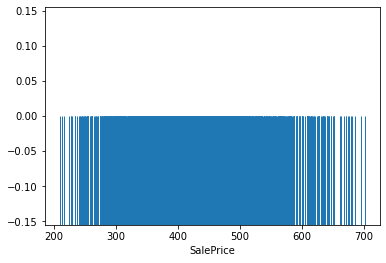

In [7]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

# observe if there is any outliers within SalePrice itself so we had some information on which dataset to look on
# sale price above 700000 seems like an outliers

In [8]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [11]:
x

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,141.000000,31770,1,0,6,5,1960,1960,112.0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,0,0,5,6,1961,1961,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,1,0,6,6,1958,1958,108.0,2,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,0,0,7,5,1968,1968,0.0,1,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,1,0,5,5,1997,1998,0.0,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,1,0,6,6,1984,1984,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2831,75.157303,8885,1,1,5,5,1983,1983,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2832,62.000000,10441,0,0,5,5,1992,1992,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2833,77.000000,10010,0,1,5,5,1974,1975,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [12]:
y**2

0       215000.0
1       105000.0
2       172000.0
3       244000.0
4       189900.0
          ...   
2830    142500.0
2831    131000.0
2832    132000.0
2833    170000.0
2834    188000.0
Name: SalePrice, Length: 2835, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train=scaler.transform(x_train)

In [17]:
x_test=scaler.transform(x_test)

In [18]:
from sklearn.linear_model import LassoCV

In [19]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [20]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [21]:
lasso_cv_model.alpha_

6.481382869014167

In [22]:
test_pred=lasso_cv_model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

387.70619853741005

In [25]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

471553.288269219

In [26]:
RMSE=np.sqrt(MSE)

RMSE=RMSE**2

RMSE

686.697377502797

In [27]:
## train performance

train_predictions=lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE**2

416.3141260789491

In [28]:
df['SalePrice'].mean()**2

169955.60105924687

In [29]:
RMSE*100/df['SalePrice'].mean()**2

0.4040451583960525

0.5% percent of error percentage for predicting sales price

In [30]:
from sklearn.metrics import r2_score

In [31]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.89

closer the value to 1, higher the accuracy of model

**Test 2 - Residual Plot and Distribution Plot**

In [32]:
test_res=y_test-test_pred

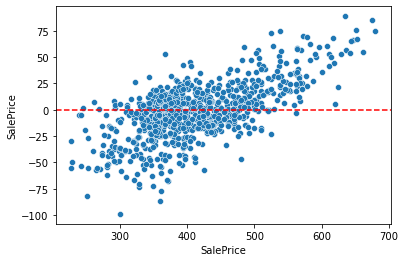

In [33]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

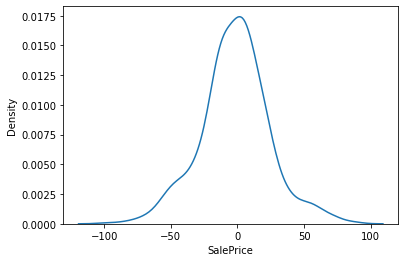

In [34]:
sns.kdeplot(test_res);

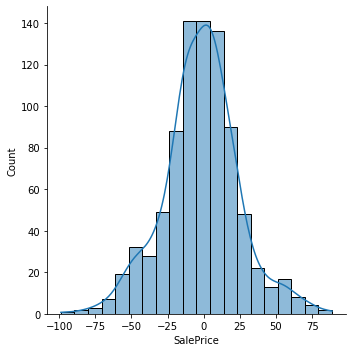

In [35]:
sns.displot(test_res,bins=20,kde=True);

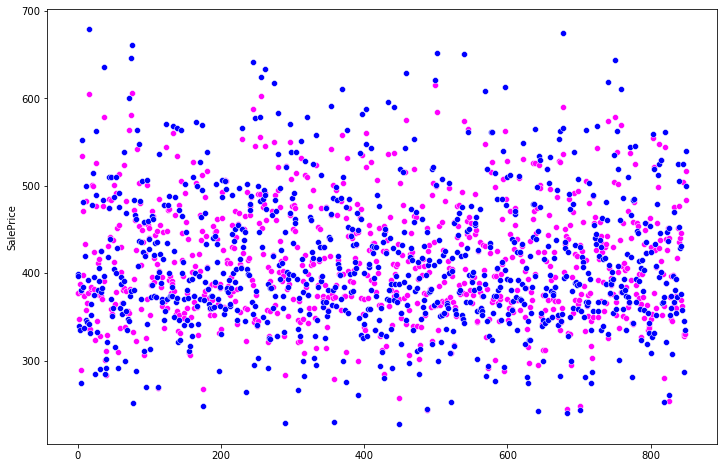

In [36]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [37]:
import scipy as sp

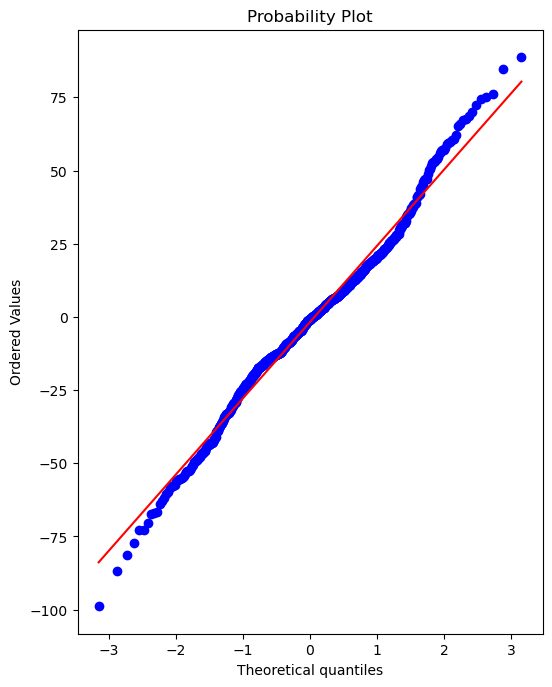

In [38]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [39]:
lasso_cv_model.coef_

array([ 0.38524156,  0.20688335,  0.        ,  0.        , 21.1606324 ,
        0.        ,  4.28206042,  1.89084758,  0.        , -4.93050123,
       -0.        , -2.68415903, -0.        , -1.26511595,  6.17224598,
        0.        , -0.        ,  5.70241612, -0.39537473, -0.        ,
        2.83142585,  0.        , -0.        , 20.29314719,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -5.66190711,  0.        ,  0.        , -3.35945074,  0.        ,
       -1.10427349,  3.32054643,  4.62146682, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -1.38

**direct method to filter useful features through lasso**

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

## re train with only features provide by lasso

In [40]:
lasso_coef=lasso_cv_model.coef_

In [41]:
lasso_coef[lasso_coef>0]

array([ 0.38524156,  0.20688335, 21.1606324 ,  4.28206042,  1.89084758,
        6.17224598,  5.70241612,  2.83142585, 20.29314719,  3.32054643,
        4.62146682,  0.36269954])

In [42]:
np.where(lasso_coef>0)

(array([  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37, 223],
       dtype=int64),)

In [43]:
lasso_coef.shape

(232,)

In [44]:
df.columns[[  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37]]

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [45]:
x=df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area']]
y=df['SalePrice']

In [46]:
x

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area
0,141.000000,31770,6,1960,1960,639.0,1080.0,1656,1656,2.0,528.0
1,80.000000,11622,5,1961,1961,468.0,882.0,896,896,1.0,730.0
2,81.000000,14267,6,1958,1958,923.0,1329.0,1329,1329,1.0,312.0
3,93.000000,11160,7,1968,1968,1065.0,2110.0,2110,2110,2.0,522.0
4,74.000000,13830,5,1997,1998,791.0,928.0,928,1629,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,6,1984,1984,819.0,1003.0,1003,1003,2.0,588.0
2831,75.157303,8885,5,1983,1983,301.0,864.0,902,902,2.0,484.0
2832,62.000000,10441,5,1992,1992,337.0,912.0,970,970,0.0,0.0
2833,77.000000,10010,5,1974,1975,1071.0,1389.0,1389,1389,2.0,418.0


In [47]:
y**2

0       215000.0
1       105000.0
2       172000.0
3       244000.0
4       189900.0
          ...   
2830    142500.0
2831    131000.0
2832    132000.0
2833    170000.0
2834    188000.0
Name: SalePrice, Length: 2835, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
final_scaler=StandardScaler()

In [51]:
final_scaler.fit(x_train)

StandardScaler()

In [52]:
x_train=final_scaler.transform(x_train)

In [53]:
x_test=final_scaler.transform(x_test)

In [54]:
from sklearn.linear_model import LassoCV

In [55]:
final_lasso_cv_model=LassoCV()

In [56]:
final_lasso_cv_model.fit(x_train,y_train)

LassoCV()

In [57]:
final_lasso_cv_model.alpha_

0.09187192756863995

In [58]:
test_pred=final_lasso_cv_model.predict(x_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

355.47776611589796

In [61]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

375603.5567284912

In [62]:
RMSE=np.sqrt(MSE)

RMSE=RMSE**2

RMSE

612.8650395711044

In [63]:
## train performance

train_predictions=final_lasso_cv_model.predict(x_train)
MAE=mean_absolute_error(y_train,train_predictions)
MAE**2

406.9724250634668

In [64]:
df['SalePrice'].mean()**2

169955.60105924687

In [65]:
RMSE*100/df['SalePrice'].mean()**2

0.3606030255851694

0.4% percent of error percentage for predicting sales price

In [66]:
from sklearn.metrics import r2_score

In [67]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.9

closer the value to 1, higher the accuracy of model

**Test 2 - Residual Plot and Distribution Plot**

In [68]:
test_res=y_test-test_pred

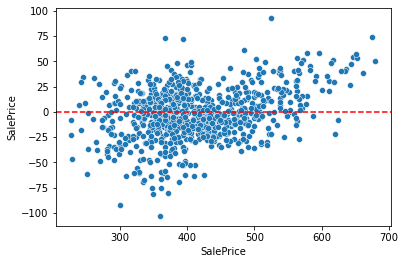

In [69]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

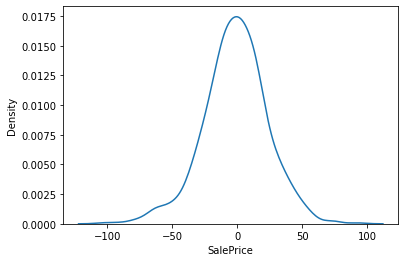

In [70]:
sns.kdeplot(test_res);

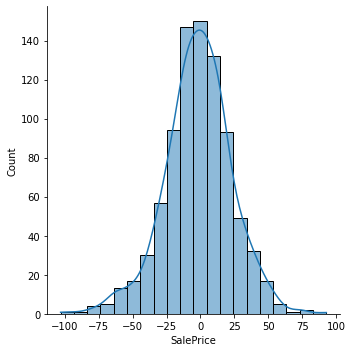

In [71]:
sns.displot(test_res,bins=20,kde=True);

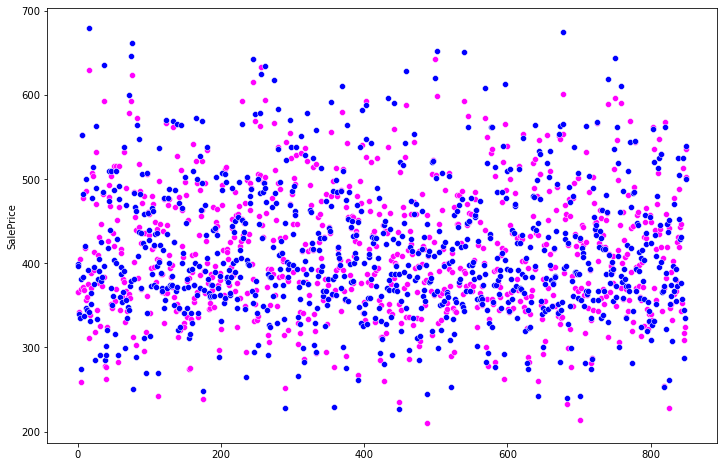

In [72]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [73]:
import scipy as sp

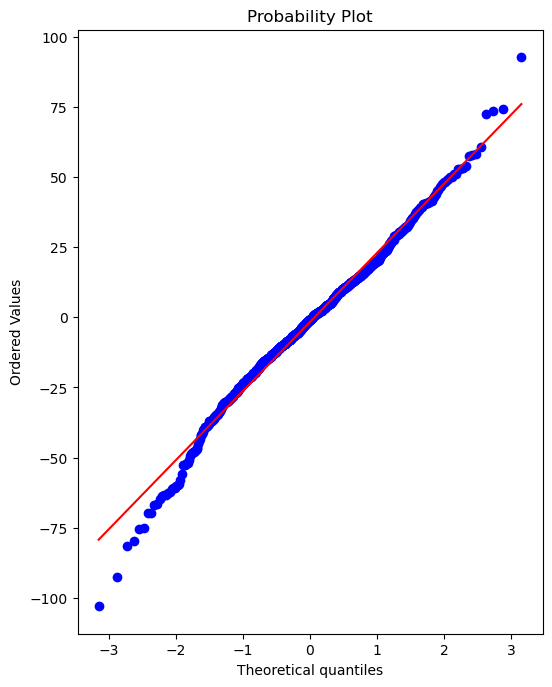

In [74]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [75]:
final_lasso_cv_model.coef_

array([ 3.77324084,  4.72380037, 27.97248952,  9.29658244,  8.32520418,
       11.04494001,  8.25771792,  2.00932481, 23.82562277,  3.64221244,
        5.06049671])

## testing model

In [76]:
predict_sales=[[141,31770,6,1960,1960,639,1080,1656,1656,2,528]]

In [77]:
predict_sales=final_scaler.transform(predict_sales)

In [78]:
final_lasso_cv_model.predict(predict_sales)**2

array([200209.20280369])

In [79]:
final_lasso_cv_model.intercept_

412.44566651829916

In [80]:
pred=predict_sales[0][0]*final_lasso_cv_model.coef_[0]+predict_sales[0][1]*final_lasso_cv_model.coef_[1]+predict_sales[0][2]*final_lasso_cv_model.coef_[2]+predict_sales[0][3]*final_lasso_cv_model.coef_[3]+predict_sales[0][4]*final_lasso_cv_model.coef_[4]+predict_sales[0][5]*final_lasso_cv_model.coef_[5]+predict_sales[0][6]*final_lasso_cv_model.coef_[6]+predict_sales[0][7]*final_lasso_cv_model.coef_[7]+predict_sales[0][8]*final_lasso_cv_model.coef_[8]+predict_sales[0][9]*final_lasso_cv_model.coef_[9]+predict_sales[0][10]*final_lasso_cv_model.coef_[10]+final_lasso_cv_model.intercept_

In [81]:
pred**2

200209.2028036861

## model deployment

In [82]:
from joblib import dump, load

In [83]:
dump(final_scaler,'ames_scaler.pkl')

['ames_scaler.pkl']

In [84]:
dump(final_lasso_cv_model,'ames_model.h5')

['ames_model.h5']

In [85]:
from joblib import dump, load

sale_price_model = load('ames_model.h5')

sale_price_scaler = load('ames_scaler.pkl')

def return_prediction(model,scaler,sample_json):
    
    lot_front = sample_json['Lot Frontage']
    lot_area = sample_json['Lot Area']
    ovr_qual = sample_json['Overall Qual']
    yr_built = sample_json['Year Built']
    yr_remod = sample_json['Year Remod/Add']
    bsmt_fin = sample_json['BsmtFin SF 1']
    t_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    gr_cars = sample_json['Garage Cars']
    gr_area = sample_json['Garage Area']
        
    
    sale_price = [[lot_front,lot_area,ovr_qual,yr_built,yr_remod,bsmt_fin,
                   t_bsmt_sf,first_flr_sf,gr_liv_area,gr_cars,gr_area]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction = model.predict(sale_price)
    
    prediction = prediction**2
    
    prediction = np.round(prediction,2)
        
    return prediction[0]

In [86]:
load('ames_scaler.pkl')

load('ames_model.h5')

LassoCV()

## observe model performance

In [102]:
sales_pred = {'Lot Frontage':141,
                 'Lot Area':31770,
                 'Overall Qual':6,
                 'Year Built':1960,
                 'Year Remod/Add':1960,
                 'BsmtFin SF 1':639,
                 'Total Bsmt SF':1080,
                 '1st Flr SF':1656,
                 'Gr Liv Area':1656,
                 'Garage Cars':2.0,
                 'Garage Area':528}

In [103]:
prediction = return_prediction(sale_price_model,sale_price_scaler,sales_pred)

In [104]:
prediction

200209.2

In [105]:
215000 - prediction

14790.799999999988

In [98]:
sales_pred = {'Lot Frontage':80,
                 'Lot Area':11622,
                 'Overall Qual':5,
                 'Year Built':1961,
                 'Year Remod/Add':1961,
                 'BsmtFin SF 1':468,
                 'Total Bsmt SF':882,
                 '1st Flr SF':896,
                 'Gr Liv Area':896,
                 'Garage Cars':1,
                 'Garage Area':730}

In [99]:
prediction = return_prediction(sale_price_model,sale_price_scaler,sales_pred)

In [100]:
prediction

122868.47

In [101]:
prediction - 105000

17868.47